<a href="https://www.kaggle.com/code/mikhail1681/youth-tobacco-consumption-analysis-usa?scriptVersionId=181789703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Youth Tobacco Consumption Analysis (USA)

# Анализ потребления табака молодежью (США)

___________________________________________________________________________________________________________________________

I implemented this project based on the ['Youth Tobacco Survey (YTS) Data (USA)'](https://www.kaggle.com/datasets/mikhail1681/youth-tobacco-survey-yts-data-usa) dataset. The dataset represents data from a survey of young people about their involvement in smoking. The survey was conducted in the United States in middle and high schools in different states.

Этот проект реализован мною с помощью датасета ['Youth Tobacco Survey (YTS) Data (USA)'](https://www.kaggle.com/datasets/mikhail1681/youth-tobacco-survey-yts-data-usa). Датасет представляет собой данные опроса молодежи о  причастности последней к курению. Опрос проводился в США в средних и старших школах разных штатов.

___________________________________________________________________________________________________________________________

The goal of the project is to study the factors influencing tobacco consumption among young people and to develop effective strategies to prevent this phenomenon.

Цель проекта — изучить факторы, влияющие на потребление табака среди молодежи, и разработать эффективные стратегии по предотвращению этого явления.

___________________________________________________________________________________________________________________________

Data Description

- YEAR: Year of survey
- LocationAbbr: Location abbreviation
- LocationDesc: Location description
- TopicType: Type of theme used in the data
- TopicDesc: Description of the theme used in the data
- MeasureDesc: Measure description
- DataSource: Source of obtained data
- Response: Interviewee's answer
- Data_Value_Unit: Unit of data value
- Data_Value_Type: Data value unit type
- Data_Value: Data value
- Data_Value_Footnote_Symbol: Data value footnote symbol
- Data Value Footnote: Data Value footnote
- Data_Value_Std_Err: Data value standard error
- Low_Confidence_Limit: Low confidence limit
- High_Confidence_Limit: High confidence limit
- Sample_Size: Sample size
- Gender: Gender of the interviewee
- Race: Race of the interviewee
- Age: Age of the interviewee
- Education: Education of the interviewee
- GeoLocation: Geo location
- TopicTypeId: Theme type ID
- TopicId: Topic ID
- MeasureId: Measure ID
- StratificationID1: Stratification ID1
- StratificationID2: Stratification ID2
- StratificationID3: Stratification ID3
- StratificationID4: Stratification ID4
- SubMeasureID: Sub measure ID
- DisplayOrder: Display order

Описание данных

- YEAR: Год исследования
- LocationAbbr: Аббревиатура местоположения
- LocationDesc: Описание локации
- TopicType: Тип темы, используемой в данных
- TopicDesc: Описание темы, используемой в данных
- MeasureDesc: Описание меры
- DataSource: Источник полученных данных
- Response: Ответ интервьюируемого
- Data_Value_Unit: Единица значения данных
- Data_Value_Type: Тип единицы измерения значения данных
- Data_Value: Значение данных
- Data_Value_Footnote_Symbol: Символ сноски к значению данных
- Data Value Footnote: Сноска о значении данных
- Data_Value_Std_Err: Значение данных стандартная ошибка
- Low_Confidence_Limit: Низкий доверительный предел
- High_Confidence_Limit: Высокий доверительный предел
- Sample_Size: Размер образца
- Gender: Пол интервьюируемого
- Race: Расовая принадлежность интервьюируемого
- Age: Возраст интервьюируемого
- Education: Образование интервьюируемого
- GeoLocation: Географическое местоположение
- TopicTypeId: Идентификатор типа темы
- TopicId: Идентификатор темы
- MeasureId: Идентификатор меры
- StratificationID1: Идентификатор стратификации 1
- StratificationID2: Идентификатор стратификации 2
- StratificationID3: Идентификатор стратификации 3
- StratificationID4: Идентификатор стратификации 4
- SubMeasureID: Идентификатор подмеры
- DisplayOrder: Порядок отображения

_______________________________________________________________________________________________________

Steps:

1. Data preparation and research.
2. Visualization.
3. Dividing data into training and test sets to train the model and evaluate its quality.
4. Training a random forest model on a training data set.
5. Model evaluation.
6. Conclusion.

Шаги:

1. Подготовка данных и исследование.
2. Визуализация.
3. Разделение данных на обучающий и тестовый наборы для обучения модели и оценки ее качества.
4. Обучение модели случайного леса на наборе обучающих данных.
5. Оценка модели.
6. Заключение.

___________________________________________________________________________________________________________________________

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youth-tobacco-survey-yts-data-usa/Youth_Tobacco_Survey__YTS__Data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ⚡1. Data preparation and research./Подготовка данных и исследование.

In [3]:
df = pd.read_csv('/kaggle/input/youth-tobacco-survey-yts-data-usa/Youth_Tobacco_Survey__YTS__Data.csv')

In [4]:
df.head(10)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
5,2009,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,2EDU,YTS12,12
6,2001,ID,Idaho,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(43.682630005, -114.363730042)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11
7,2004,VT,Vermont,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(43.625381239, -72.517640791)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS09,9
8,2007,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
9,2006,PA,Pennsylvania,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.793730152, -77.860700294)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [6]:
df.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [7]:
df.nunique()

YEAR                            19
LocationAbbr                    50
LocationDesc                    50
TopicType                        1
TopicDesc                        3
MeasureDesc                      4
DataSource                       2
Response                         3
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     750
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             111
Low_Confidence_Limit           688
High_Confidence_Limit          844
Sample_Size                   2625
Gender                           3
Race                             1
Age                              1
Education                        2
GeoLocation                     50
TopicTypeId                      1
TopicId                          3
MeasureId                        4
StratificationID1                3
StratificationID2                1
StratificationID3                1
StratificationID4   

In [8]:
'''Rename the Data_Value column and add the unit of measurement (%) to the name. 
Thus, we get rid of unnecessary columns Data_Value_Unit and Data_Value_Type.'''

'''Переименуйте столбец Data_Value и добавьте к имени единицу измерения (%).
Таким образом мы избавляемся от ненужных столбцов Data_Value_Unit и Data_Value_Type.'''

df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

In [9]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Tobacco consumption percentage (%)',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Gender', 'Race', 'Age', 'Education', 'GeoLocation',
       'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1',
       'StratificationID2', 'StratificationID3', 'StratificationID4',
       'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [10]:
# Definition of variables for further work.

# Определение переменных для дальнейшей работы.

df = df[['YEAR', 'LocationDesc', 'TopicDesc',
       'MeasureDesc', 'Response', 'Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender',
       'Education', 'DisplayOrder']]

In [11]:
df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
                   'High_Confidence_Limit', 'Sample_Size', 'Response'], inplace=True)

In [12]:
df['Gender'].value_counts()

Gender
Overall    2729
Female     2729
Male       2729
Name: count, dtype: int64

In [13]:
'''The 'Gender' column is divided into exactly three parts. Let's assume the survey was split equally between genders. 
This means we'll create masks for half of the 'Overall' values, and assign them the values 'Male' and 'Female'.'''

'''Столбец 'Gender' разделен ровно на три части. Предположим, что опрос был разделен поровну между полами.
Это означает, что мы создадим маски для половины значений 'Overall' и присвоим им значения 'Male' и 'Female'.'''

mask = np.random.choice([True, False], size=len(df))


df.loc[mask, 'Gender'] = 'Male'


df.loc[~mask, 'Gender'] = 'Female'

In [14]:
df['Gender'].value_counts()

Gender
Male      4159
Female    4028
Name: count, dtype: int64

In [15]:
df.isna().sum()

YEAR                                  0
LocationDesc                          0
TopicDesc                             0
MeasureDesc                           0
Response                              0
Tobacco consumption percentage (%)    0
Data_Value_Std_Err                    0
Low_Confidence_Limit                  0
High_Confidence_Limit                 0
Sample_Size                           0
Gender                                0
Education                             0
DisplayOrder                          0
dtype: int64

In [16]:
df.head()

,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Tobacco consumption percentage (%),Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education,DisplayOrder
0,2004,Ohio,Cigarette Use (Youth),Smoking Status,Ever,32.2,3.2,25.8,38.5,1377.0,Female,Middle School,8
1,2008,Alabama,Cigarette Use (Youth),Smoking Status,Ever,47.8,2.9,42.1,53.5,654.0,Female,High School,8
2,2015,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,12.7,1.9,9.0,16.4,781.0,Female,High School,12
3,2005,Illinois,Cigarette Use (Youth),Smoking Status,Ever,28.5,2.2,24.2,32.8,1323.0,Male,Middle School,8
4,2005,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,20.5,2.3,16.0,25.1,973.0,Female,High School,11


# ⚡2. Visualization./Визуализация.

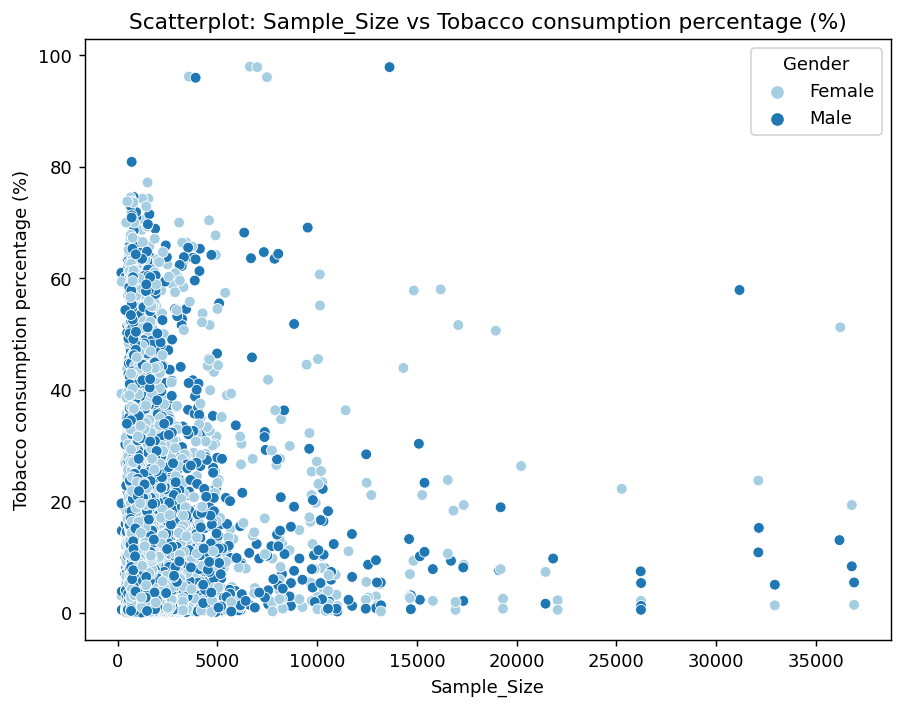

In [17]:
plt.figure(figsize=(8, 6), dpi=130)
sns.scatterplot(data=df, x='Sample_Size', y='Tobacco consumption percentage (%)', hue='Gender', palette='Paired')
plt.title('Scatterplot: Sample_Size vs Tobacco consumption percentage (%)')
plt.xlabel('Sample_Size')
plt.ylabel('Tobacco consumption percentage (%)');

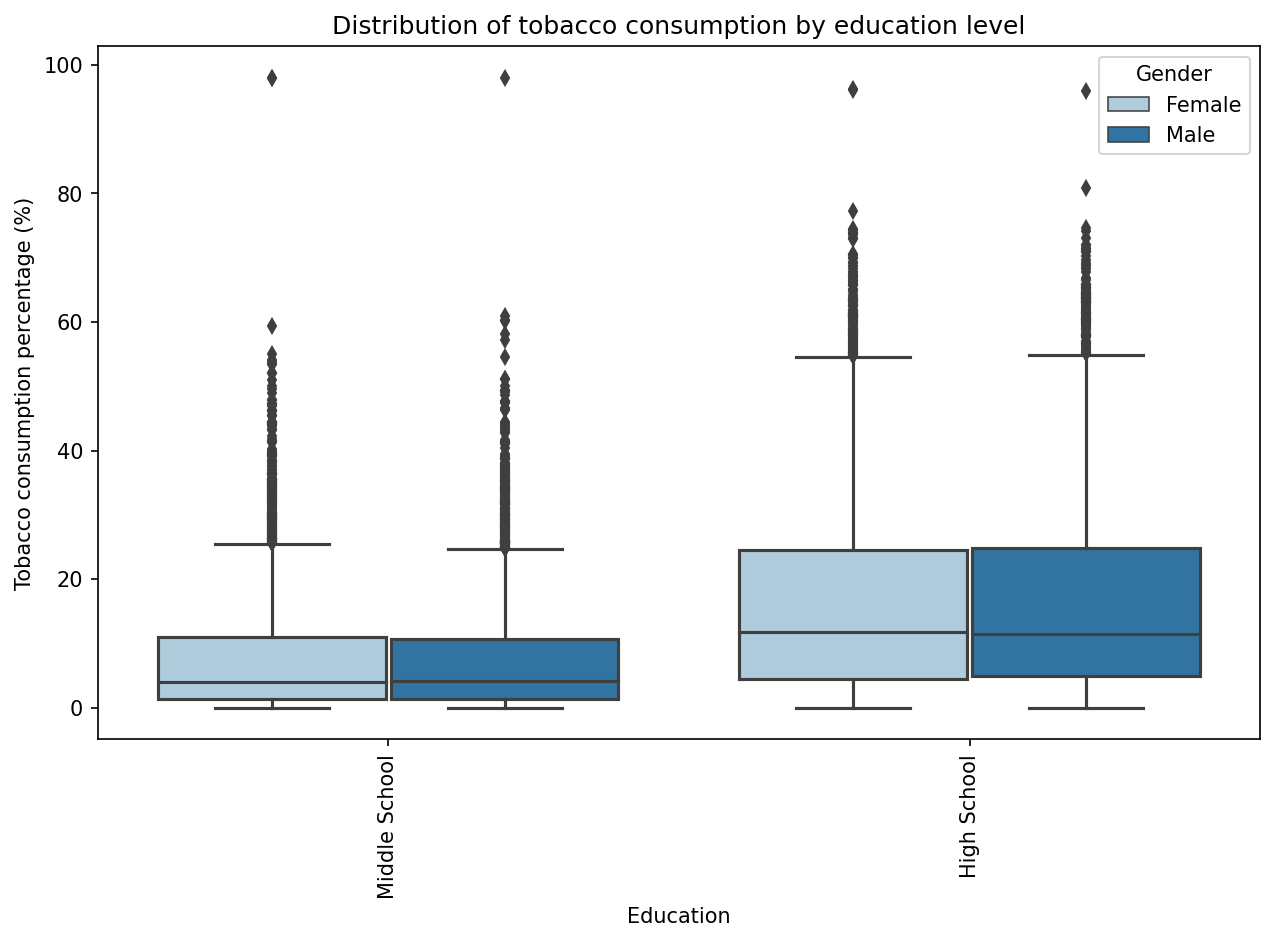

In [18]:
plt.figure(figsize=(10, 6), dpi=150)
sns.boxplot(data=df, x='Education', y='Tobacco consumption percentage (%)', hue='Gender', palette='Paired')
plt.xlabel('Education')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Distribution of tobacco consumption by education level')
plt.xticks(rotation=90);

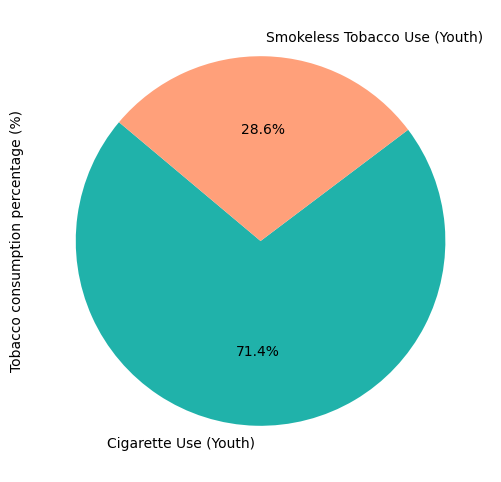

In [19]:
plt.figure(figsize=(6, 6))
df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140,
                        colors=['lightseagreen', 'lightsalmon']);

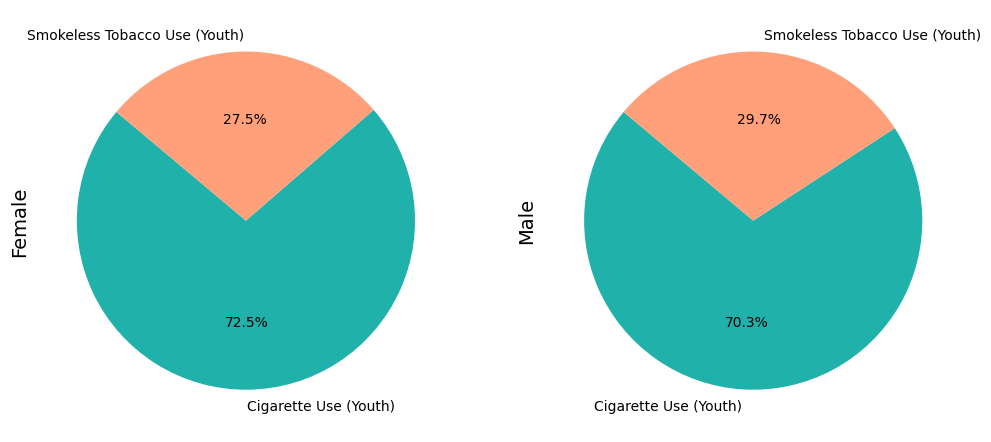

In [20]:
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['lightseagreen', 'lightsalmon'])
axes[0].set_ylabel('Female', fontsize=14)

male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['lightseagreen', 'lightsalmon'])
axes[1].set_ylabel('Male', fontsize=14);

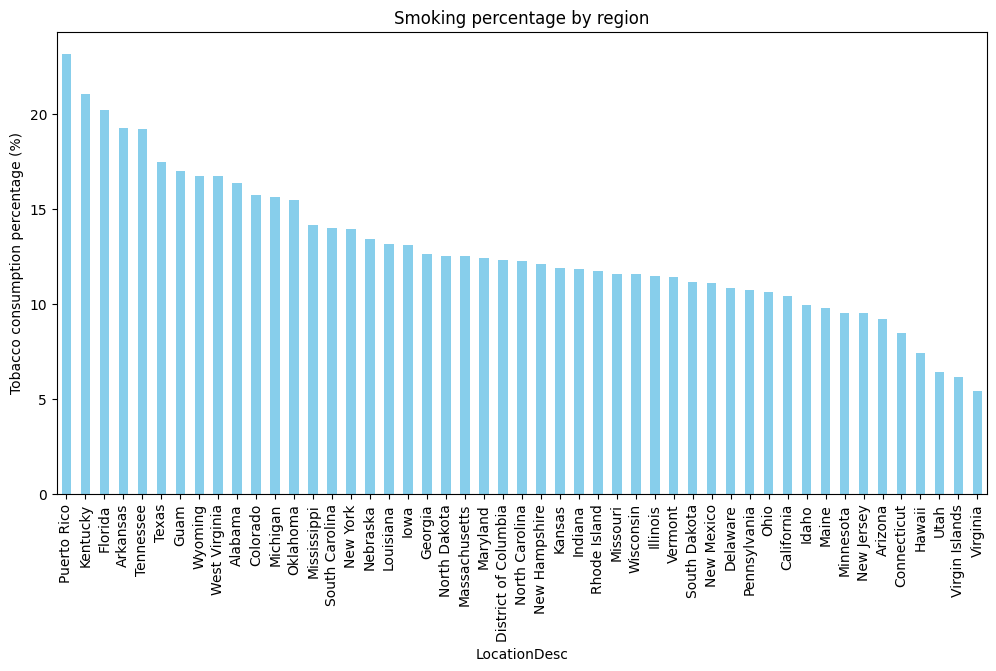

In [21]:
region_smoking = df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
region_smoking.plot(kind='bar', color='skyblue')
plt.title('Smoking percentage by region')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xlabel('LocationDesc')
plt.xticks(rotation=90);

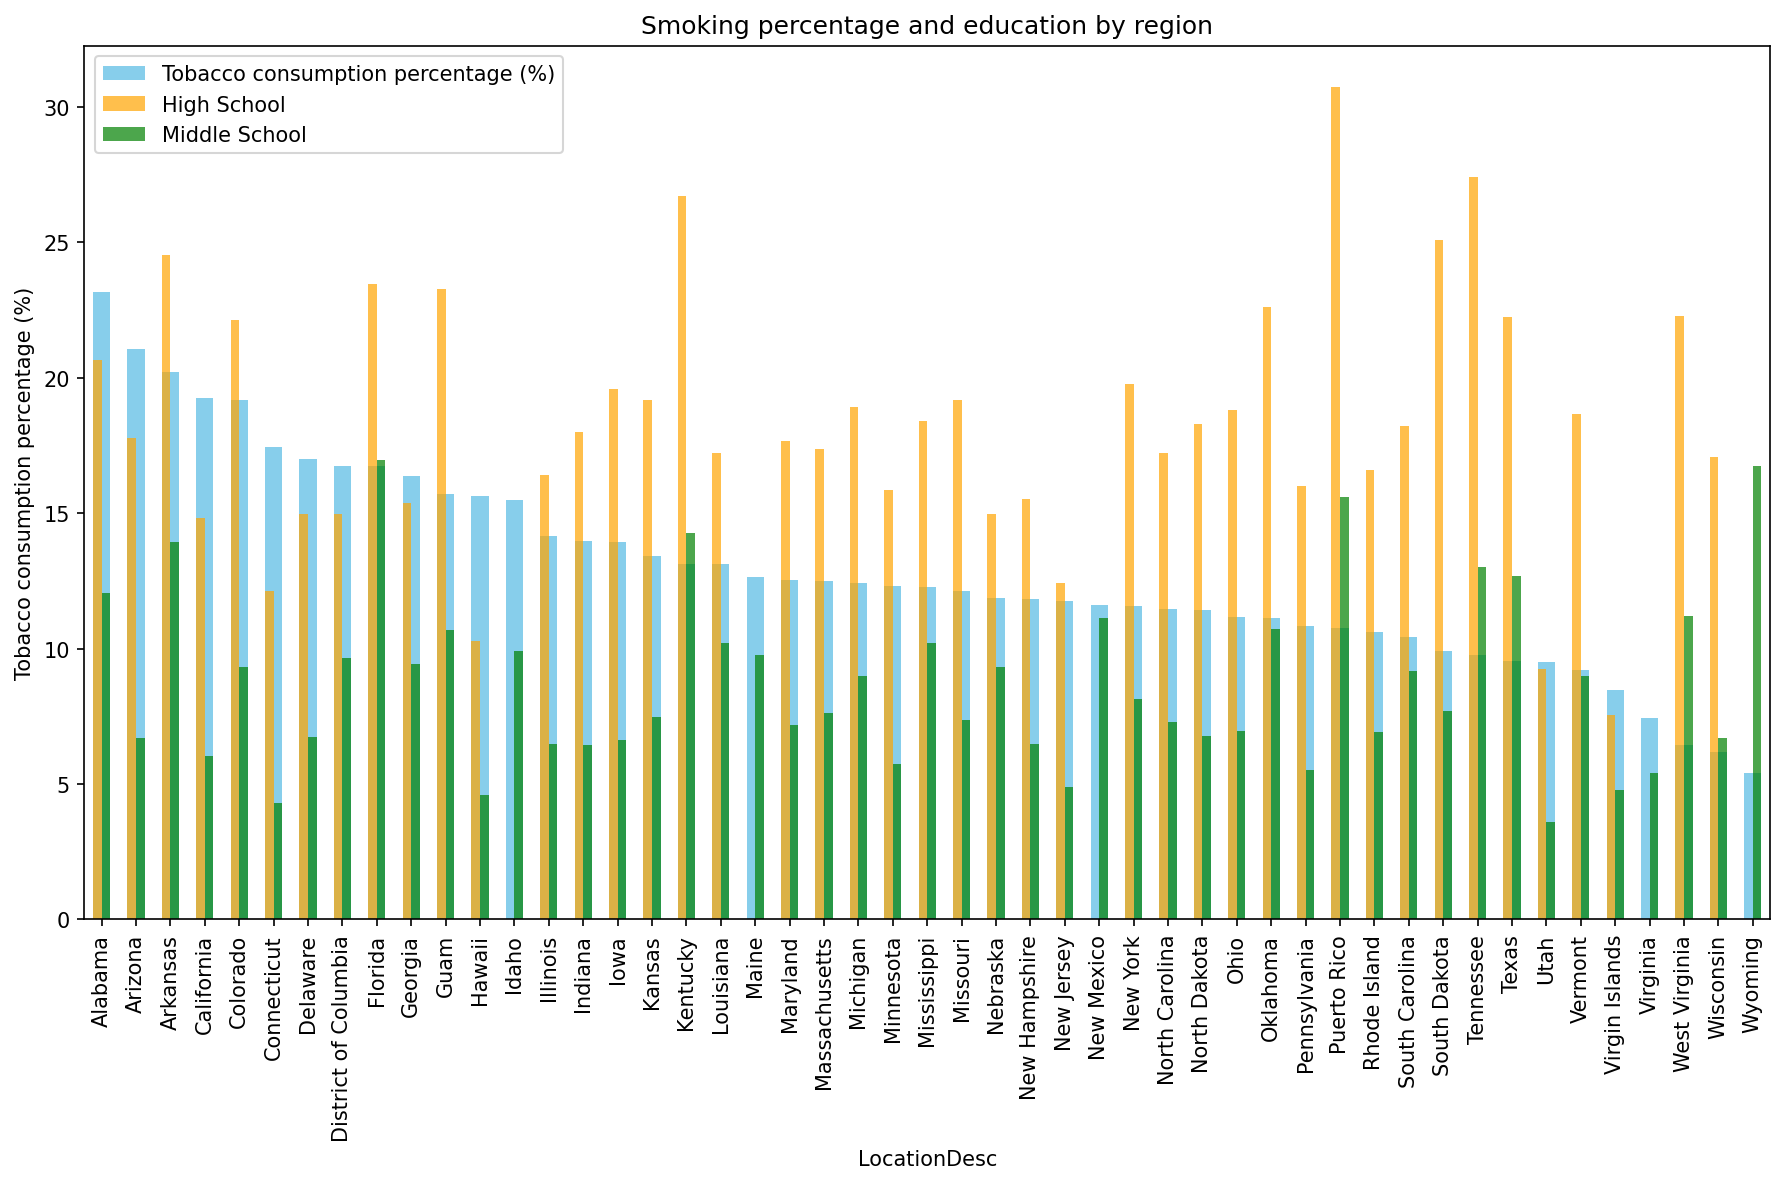

In [22]:
region_smoking = df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)

education_smoking = df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack()

plt.figure(figsize=(12, 8), dpi=150)
region_smoking.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education_smoking.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)  # Поворот подписей регионов для лучшей читаемости
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

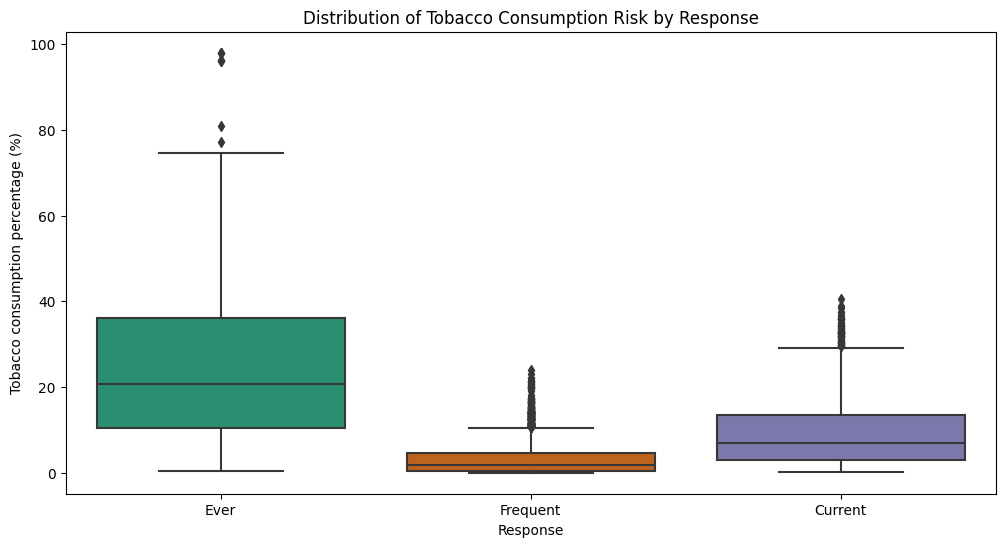

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Response', y='Tobacco consumption percentage (%)', palette='Dark2')
plt.title('Distribution of Tobacco Consumption Risk by Response')
plt.xlabel('Response')
plt.ylabel('Tobacco consumption percentage (%)');

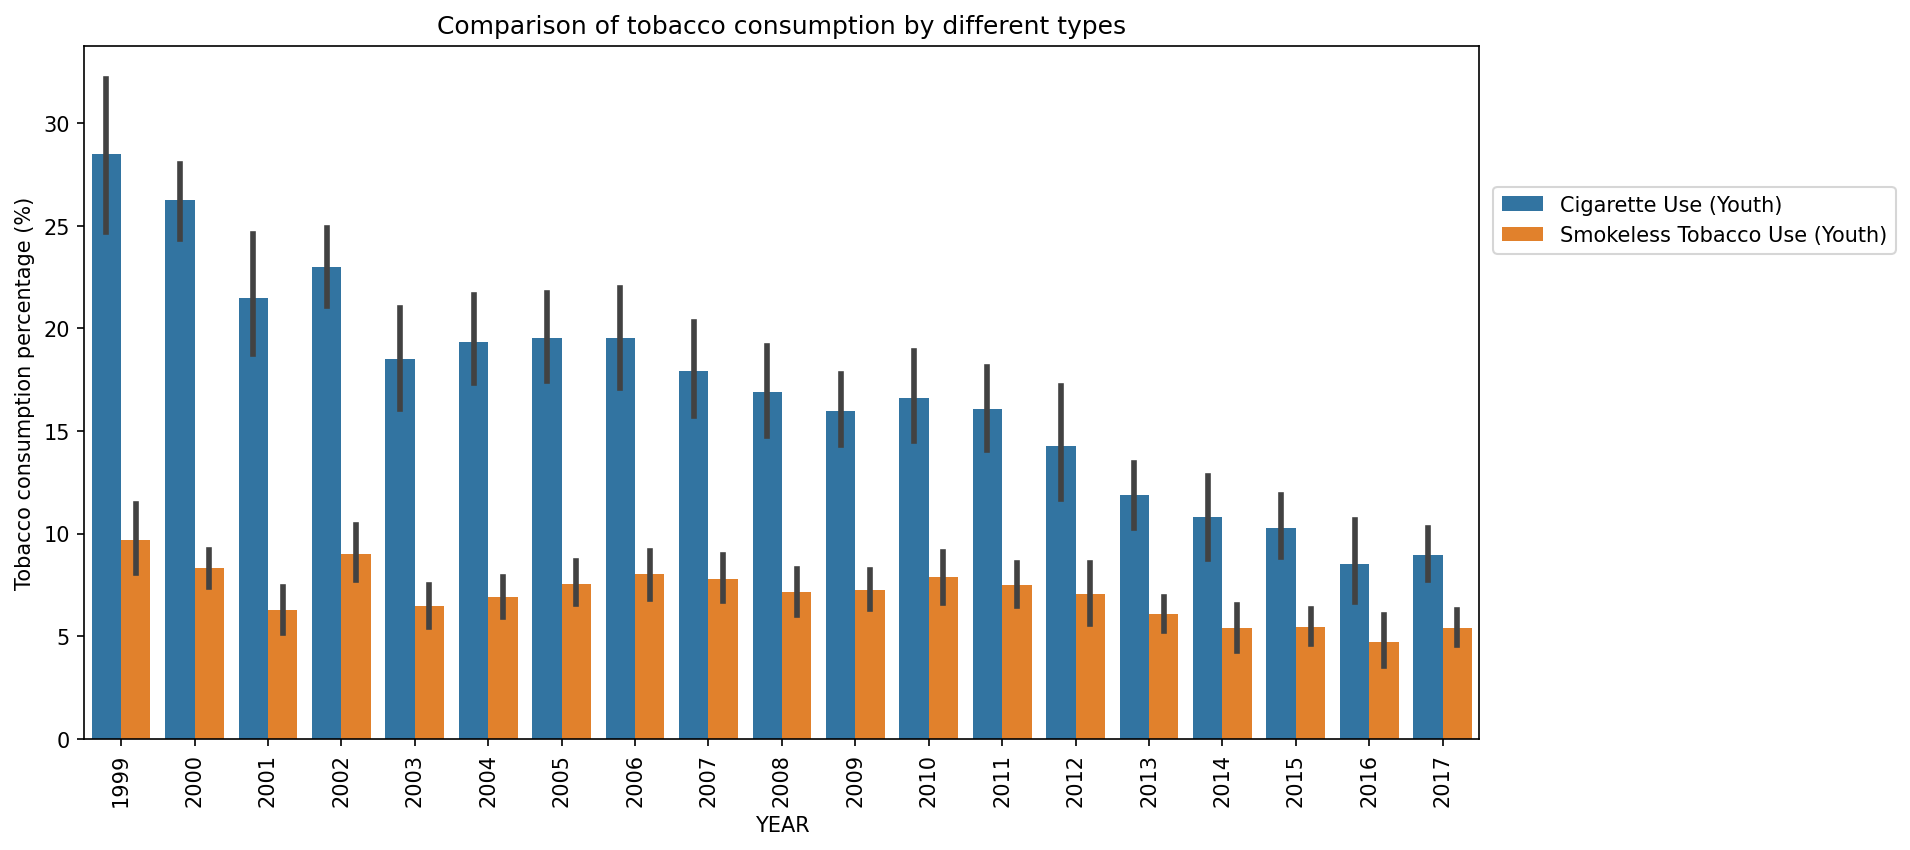

In [24]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(data=df, x='YEAR', y='Tobacco consumption percentage (%)', hue='TopicDesc')
plt.xlabel('YEAR')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Сomparison of tobacco consumption by different types')
plt.xticks(rotation=90)
plt.legend(title='TopicDesc')
plt.legend(loc=(1.01, 0.7));

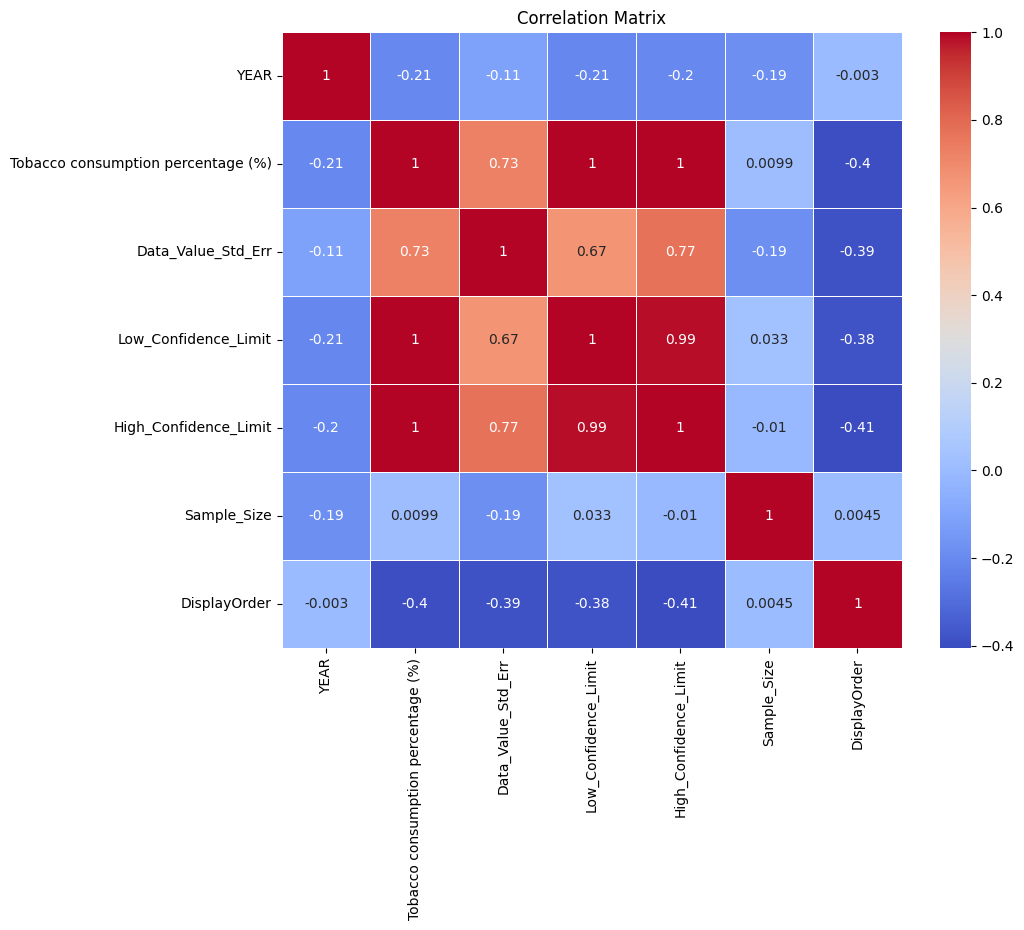

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix');

High correlation between the 'Tobacco consumption percentage (%)' and the lower and upper levels of the confidence interval ('Low_Confidence_Limit', 'High_Confidence_Limit'). This may mean that the percentage of tobacco use increases with the level of confidence in that percentage. This is not surprising since confidence intervals are largely determined by the percentage itself and its standard error.

Высокая корреляция между 'Tobacco consumption percentage (%)' нижним и верхним уровнями доверительного интервала («Low_Confidence_Limit», «High_Confidence_Limit»). Это может означать, что процент употребления табака увеличивается с уровнем уверенности в этом проценте. Это неудивительно, поскольку доверительные интервалы во многом определяются самим процентом и его стандартной ошибкой.

In [26]:
df.columns

Index(['YEAR', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Response',
       'Tobacco consumption percentage (%)', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Education', 'DisplayOrder'],
      dtype='object')

In [27]:
categorical_features = ['TopicDesc', 'MeasureDesc', 'Response', 'Education', 'Gender']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [28]:
df.head()

,YEAR,LocationDesc,Tobacco consumption percentage (%),Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder,TopicDesc_Smokeless Tobacco Use (Youth),MeasureDesc_User Status,Response_Ever,Response_Frequent,Education_Middle School,Gender_Male
0,2004,Ohio,32.2,3.2,25.8,38.5,1377.0,8,False,False,True,False,True,False
1,2008,Alabama,47.8,2.9,42.1,53.5,654.0,8,False,False,True,False,False,False
2,2015,West Virginia,12.7,1.9,9.0,16.4,781.0,12,True,True,False,True,False,False
3,2005,Illinois,28.5,2.2,24.2,32.8,1323.0,8,False,False,True,False,True,True
4,2005,Connecticut,20.5,2.3,16.0,25.1,973.0,11,True,True,True,False,False,False


# ⚡3. Dividing data into training and test sets to train the model and evaluate its quality./Разделение данных на обучающий и тестовый наборы для обучения модели и оценки ее качества.

In [29]:
X = df.drop(['Tobacco consumption percentage (%)', 'YEAR', 'LocationDesc'], axis=1)

In [30]:
y = df['Tobacco consumption percentage (%)']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# ⚡4. Training a random forest model on a training data set./Обучение модели случайного леса на наборе обучающих данных.

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=101)

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

# ⚡5. Model evaluation./Оценка модели.

In [36]:
model.score(X_test, y_test)

0.9999323046663986

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mse = mean_squared_error(y_test, y_pred)

In [40]:
mse

0.014446561050061275

In [41]:
mae = mean_absolute_error(y_test, y_pred)

In [42]:
mae

0.05433150183150187

# ⚡6. Conclusion./Заключение.

   Having studied various aspects of tobacco consumption among young people, including the distribution of the percentage of tobacco consumption by various regions, education, gender and other characteristics, we built a model for predicting tobacco consumption that takes into account these factors, which allows us to assess their influence on this indicator with sufficient accuracy. The coefficient of determination (R^2) is very close to 1, which indicates the high efficiency and accuracy of the model. The average absolute error is approximately 0.054 and indicates that the model deviates by this amount on average. The findings may be useful for developing targeted programs to combat tobacco dependence and improve public health.
   From the analysis we see that over the period from 1999 to 2017, the number of smokers among young people decreased by almost three times. This fact cannot but rejoice. We also see significant differences in youth smoking rates between different states. Which gives us food for further research. For example, income by state, availability of tobacco products (price and taxes on tobacco products), social factors (cultural traditions), stress level, etc.

   Изучив различные аспекты потребления табака среди молодежи, в том числе распределение процента потребления табака по различным регионам, образованию, полу и другим характеристикам, мы построили модель прогнозирования потребления табака, учитывающую эти факторы, что позволяет нам оценить их влияние на этот показатель с достаточной точностью. Коэффициент детерминации (R^2) очень близок к 1, что говорит о высокой эффективности и точности модели. Средняя абсолютная ошибка состовляет примерно 0.054 и указывает на отклонение модели в среднем на это число. Полученные данные могут быть полезны для разработки целевых программ по борьбе с табачной зависимостью и улучшению здоровья населения.
   Из проведенного анализа мы видим, что за промежуток времени с 1999 года по 2017 год количество курильщиков среди молодежи снизилось почти в три раза. Этот факт не может не радовать. Также мы видим значительную разницу по количеству курильщиков среди молодежи между различными штатами. Что дает нам пищу для дальнейших исследований. Например, доходов населения по штатам, доступность табачных продуктов(цена и налоги на табачные изделия), социальные факторы(культурные традиции), уровень стресса и т.п.